### Import Essential Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read date-price table

In [105]:
calendar = pd.read_csv('calendar.csv.gz')

In [106]:
calendar.head()

,listing_id,date,available,price
0,8207551,2018-04-07,f,NaN
1,8207551,2018-04-06,f,NaN
2,8207551,2018-04-05,f,NaN
3,8207551,2018-02-09,f,NaN
4,8207551,2018-02-08,f,NaN


In [107]:
calendar.shape

(6443345, 4)

In [109]:
calendar.date.min(),calendar.date.max()

('2017-04-07', '2018-04-07')

In [110]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         3068162
dtype: int64

In [111]:
calendar = calendar.dropna()

In [112]:
calendar.shape

(3375183, 4)

In [113]:
calendar.head()

,listing_id,date,available,price
365,14958299,2018-03-25,t,$60.00
366,14958299,2018-03-24,t,$60.00
367,14958299,2018-03-23,t,$60.00
368,14958299,2018-03-22,t,$60.00
369,14958299,2018-03-21,t,$60.00


In [114]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [115]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375183 entries, 365 to 6443343
Data columns (total 4 columns):
listing_id    int64
date          datetime64[ns]
available     object
price         object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 128.8+ MB


In [119]:
calendar['price'] = calendar['price'].str.replace('$','')
calendar['price'] = calendar['price'].str.replace(',','')
calendar.head()

,listing_id,date,available,price
365,14958299,2018-03-25,t,60.00
366,14958299,2018-03-24,t,60.00
367,14958299,2018-03-23,t,60.00
368,14958299,2018-03-22,t,60.00
369,14958299,2018-03-21,t,60.00


In [120]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375183 entries, 365 to 6443343
Data columns (total 4 columns):
listing_id    int64
date          datetime64[ns]
available     object
price         object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 128.8+ MB


In [121]:
calendar['price'] = calendar['price'].astype(float)
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375183 entries, 365 to 6443343
Data columns (total 4 columns):
listing_id    int64
date          datetime64[ns]
available     object
price         float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 128.8+ MB


#### Extract the metrics need in time

In [126]:
mean_of_mouth = calendar.groupby(calendar['date'].dt.strftime('%B'))['price'].mean()

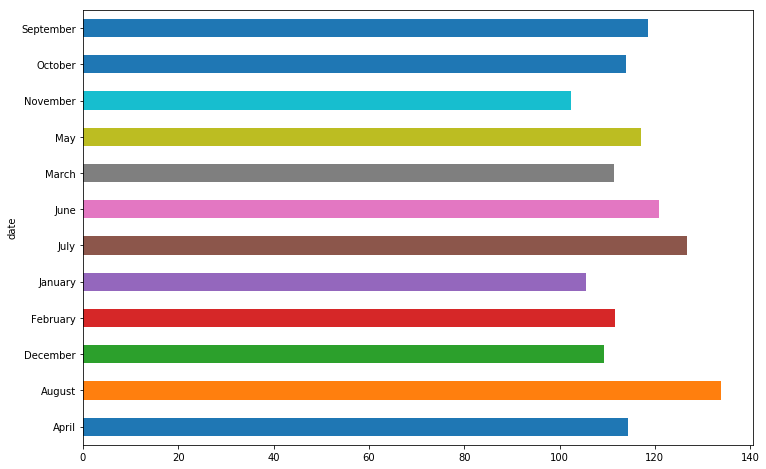

In [127]:
mean_of_mouth.plot(kind='barh',figsize=(12,8))

In [129]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
calendar.head()

,listing_id,date,available,price,dayofweek
365,14958299,2018-03-25,t,60.0,Sunday
366,14958299,2018-03-24,t,60.0,Saturday
367,14958299,2018-03-23,t,60.0,Friday
368,14958299,2018-03-22,t,60.0,Thursday
369,14958299,2018-03-21,t,60.0,Wednesday


In [131]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [130]:
calendar.groupby(['dayofweek']).mean()

,listing_id,price
dayofweek,,
Friday,9.221577e+06,117.198882
Monday,9.206193e+06,114.649274
Saturday,9.226245e+06,117.288036
Sunday,9.220754e+06,114.919700
Thursday,9.210592e+06,114.482776
Tuesday,9.195639e+06,114.570030
Wednesday,9.203787e+06,114.400585


In [132]:
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week

,listing_id,price
dayofweek,,
Monday,9.206193e+06,114.649274
Tuesday,9.195639e+06,114.570030
Wednesday,9.203787e+06,114.400585
Thursday,9.210592e+06,114.482776
Friday,9.221577e+06,117.198882
Saturday,9.226245e+06,117.288036
Sunday,9.220754e+06,114.919700


In [133]:
price_week.drop('listing_id',axis=1,inplace = True)

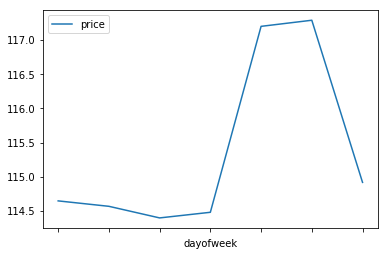

In [134]:
price_week.plot()

In [136]:
calendar.head()

,listing_id,date,available,price,dayofweek
365,14958299,2018-03-25,t,60.0,Sunday
366,14958299,2018-03-24,t,60.0,Saturday
367,14958299,2018-03-23,t,60.0,Friday
368,14958299,2018-03-22,t,60.0,Thursday
369,14958299,2018-03-21,t,60.0,Wednesday


([<matplotlib.axis.XTick at 0x1b3b73f8128>,
 <a list of 7 Text xticklabel objects>)

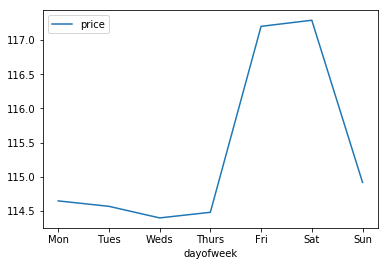

In [137]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
price_week = calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id',axis=1,inplace = True)
price_week.plot()
ticks = list(range(0,7,1))
labels = 'Mon Tues Weds Thurs Fri Sat Sun'.split(' ')
plt.xticks(ticks,labels)

### Listing Information

In [138]:
listings = pd.read_csv('listings.csv.gz')

e:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [139]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,8207551,https://www.airbnb.com/rooms/8207551,20170407214050,2017-04-08,Room in Sant Antoni huge terrasse,Located between Sant Antoni & Universitat (met...,the apartment is located on the 7th floor and ...,Located between Sant Antoni & Universitat (met...,none,Sant Antoni is a very central neighborhood and...,...,10.0,t,NaN,NaN,f,strict,f,f,2,0.11
1,14958299,https://www.airbnb.com/rooms/14958299,20170407214050,2017-04-08,"Next To Las Ramblas, Unique, Wif1","Brand new apartment, cosy and clean. Only 5 m...","Fun, bohemian. Real Catalan style Well equippe...","Brand new apartment, cosy and clean. Only 5 m...",none,NaN,...,8.0,t,NaN,NaN,t,strict,f,f,1,2.26
2,7766152,https://www.airbnb.com/rooms/7766152,20170407214050,2017-04-08,Sunny whole flat in Raval/Ramblas,"Calm, sunny 43sqm flat. Living room w/balcony ...","Very luminous and calm, in a neighborhood than...","Calm, sunny 43sqm flat. Living room w/balcony ...",none,"Very central, lively, popular hood. Near the s...",...,9.0,t,NaN,NaN,f,strict,f,f,1,0.40
3,9237132,https://www.airbnb.com/rooms/9237132,20170407214050,2017-04-08,Apartment in the heart of Barcelona,The apartment is an ideal place for relax afte...,Both rooms include a comfortable double bed wi...,The apartment is an ideal place for relax afte...,none,NaN,...,9.0,t,NaN,NaN,t,flexible,f,f,1,3.17
4,1406827,https://www.airbnb.com/rooms/1406827,20170407214050,2017-04-08,Centric Bohemian next Ramblas&Macba,Artistic cosy renovated flat 40m2 with balcony...,The apartment is 40m2 and has everything you n...,Artistic cosy renovated flat 40m2 with balcony...,none,Raval is the distric where most of the young a...,...,8.0,t,43212,NaN,t,moderate,f,f,1,5.06


In [140]:
listings.shape

(17653, 95)

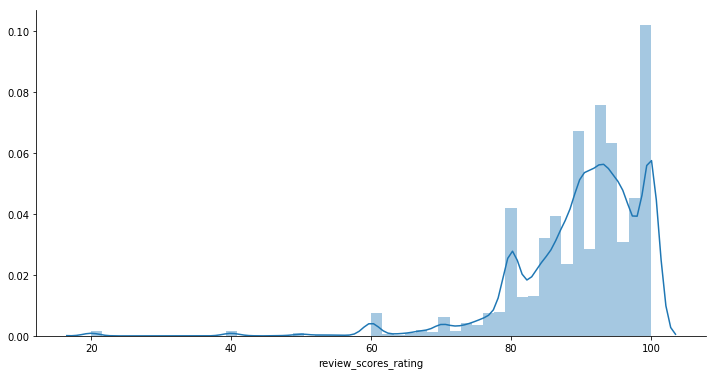

In [146]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna())
sns.despine()
plt.show()

In [147]:
listings.review_scores_rating.describe()

count    14015.000000
mean        89.937139
std          9.374362
min         20.000000
25%         86.000000
50%         92.000000
75%         96.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [148]:
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = listings['price'].astype(float)
listings['price'].describe()

count    17653.000000
mean        92.092392
std        159.911422
min          9.000000
25%         35.000000
50%         62.000000
75%        105.000000
max       9379.000000
Name: price, dtype: float64

In [149]:
high_price = listings.sort_values('price',ascending=False)
high_price.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
13702,16738878,https://www.airbnb.com/rooms/16738878,20170407214050,2017-04-08,Villa 1904- Modernist Jewel with Impeccable Views,"This modernist jewel, designed by famous archi...",Impeccably decorated and filled with remarkabl...,"This modernist jewel, designed by famous archi...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
10353,13259140,https://www.airbnb.com/rooms/13259140,20170407214050,2017-04-08,Nice double room in flat overlooking Montjuic,"Close to Poble Espanyol, CaixaForum, Font Màgi...",NaN,"Close to Poble Espanyol, CaixaForum, Font Màgi...",none,NaN,...,9.0,t,NaN,NaN,f,flexible,f,f,1,0.68
10912,17211611,https://www.airbnb.com/rooms/17211611,20170407214050,2017-04-08,Luxury Motor Yacht in Port Vell,New listing- Professionally crewed motor yacht...,NaN,New listing- Professionally crewed motor yacht...,none,"Bordering Gothic and El Born, the vessel is lo...",...,NaN,t,NaN,NaN,f,flexible,f,f,1,NaN
12100,736098,https://www.airbnb.com/rooms/736098,20170407214050,2017-04-08,Great Discount! Jacuzzi Apartment,NaN,Great Discount. Jacuzzi Appartment at les Cort...,Great Discount. Jacuzzi Appartment at les Cort...,none,NaN,...,10.0,t,NaN,NaN,f,moderate,f,f,1,0.13
1988,16753970,https://www.airbnb.com/rooms/16753970,20170407214050,2017-04-08,Jewel in Ancient City - Architectural Masterpiece,"In the heart of Barcelona's Gothic Quarter, Je...","In the heart of Barcelona's Gothic Quarter, Je...","In the heart of Barcelona's Gothic Quarter, Je...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
12965,16754469,https://www.airbnb.com/rooms/16754469,20170407214050,2017-04-08,City Lux - A Spacious 3BR Condo in the City!,"This majestic residence, located in one of the...","Upon entering this 3800 square foot residence,...","This majestic residence, located in one of the...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
1999,16751496,https://www.airbnb.com/rooms/16751496,20170407214050,2017-04-08,Villa Adriana- Stunning Views of the Mediterra...,"Upon arriving at Villa Adriana, guests are swe...","Upon arriving at Villa Adriana, guests are swe...","Upon arriving at Villa Adriana, guests are swe...",none,NaN,...,NaN,t,NaN,NaN,f,super_strict_60,f,f,8,NaN
12465,17234057,https://www.airbnb.com/rooms/17234057,20170407214050,2017-04-08,Casa Arriba - 4BR with Spectacular Views,Perched high in Barcelona with spectacular vie...,"Flooded with light, the great room is expansiv...",Perched high in Barcelona with spectacular vie...,none,NaN,...,NaN,t,NaN,NaN,f,strict,f,f,8,NaN
13000,3965808,https://www.airbnb.com/rooms/3965808,20170407214050,2017-04-08,Luxury penthouse in Turó Park,Impressive 450sqm penthouse located in the exc...,This 450sqm penthouse takes up the entire 7th ...,Impressive 450sqm penthouse located in the exc...,none,The Turó Park area is one of the most exclusiv...,...,NaN,t,NaN,NaN,f,strict,f,f,1,NaN
4596,14466637,https://www.airbnb.com/rooms/14466637,20170407214050,2017-04-08,Double room in the centre of Barcelona,"With a charming, central location in the heart...",NaN,"With a charming, central location in the heart...",none,"En el centro de Barcelona, una zona con muchas...",...,9.0,t,NaN,NaN,f,flexible,f,f,1,0.79


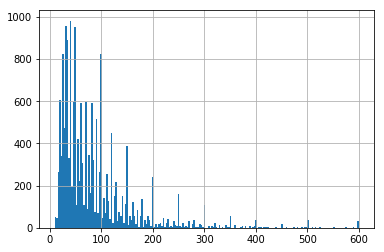

In [151]:
listings.loc[(listings['price']<=600) & (listings['price']>0)].price.hist(bins=200)

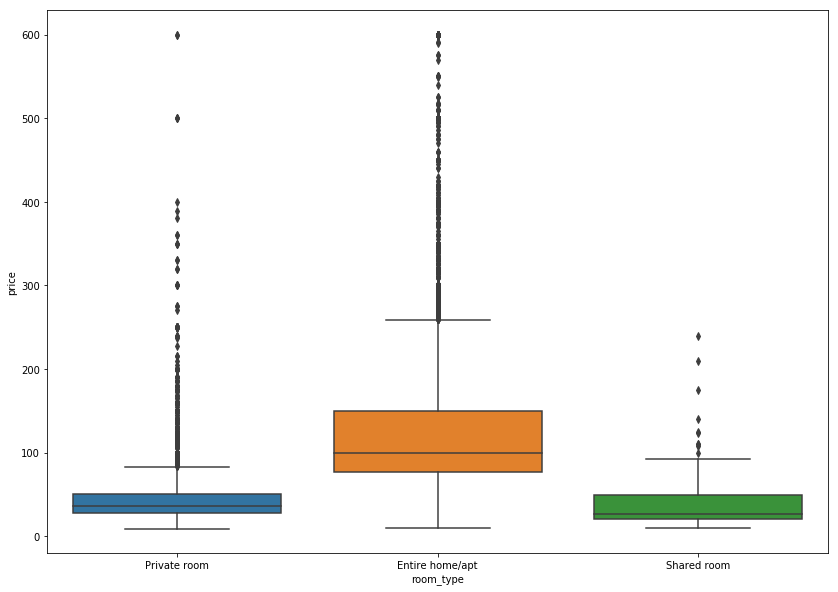

In [153]:
f,ax = plt.subplots(figsize=(14,10))
sns.boxplot(y='price',x='room_type',data=listings.loc[(listings['price']<=600) & (listings['price']>0)])

### Top 10 most common facilities

In [156]:
listings.amenities[:5]

0    {TV,Internet,"Wireless Internet","Air conditio...
1    {Internet,"Wireless Internet",Kitchen,Washer,E...
2    {Internet,"Wireless Internet","Air conditionin...
3    {Internet,"Wireless Internet",Kitchen,"Elevato...
4    {"Wireless Internet",Kitchen,"Smoking allowed"...
Name: amenities, dtype: object

In [158]:
listings.amenities = listings.amenities.str.replace('[{}]','').str.replace('"','')


In [161]:
listings.amenities[:5]

0    TV,Internet,Wireless Internet,Air conditioning...
1    Internet,Wireless Internet,Kitchen,Washer,Esse...
2    Internet,Wireless Internet,Air conditioning,Ki...
3    Internet,Wireless Internet,Kitchen,Elevator in...
4    Wireless Internet,Kitchen,Smoking allowed,Pets...
Name: amenities, dtype: object

In [162]:
listings['amenities'].map(lambda amns:amns.split(','))[:5]

0    [TV, Internet, Wireless Internet, Air conditio...
1    [Internet, Wireless Internet, Kitchen, Washer,...
2    [Internet, Wireless Internet, Air conditioning...
3    [Internet, Wireless Internet, Kitchen, Elevato...
4    [Wireless Internet, Kitchen, Smoking allowed, ...
Name: amenities, dtype: object

In [163]:
np.concatenate(listings['amenities'].map(lambda amns:amns.split(',')))

array(['TV', 'Internet', 'Wireless Internet', ..., 'Essentials',
       'Hangers', 'translation missing: en.hosting_amenity_49'],
      dtype='<U42')

In [164]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns:amns.split(',')))).value_counts().head(10)

Wireless Internet       16804
Kitchen                 15877
Essentials              15052
Washer                  13669
Heating                 13108
TV                      11856
Elevator in building    10792
Hangers                 10761
Family/kid friendly     10619
Hair dryer              10273
dtype: int64

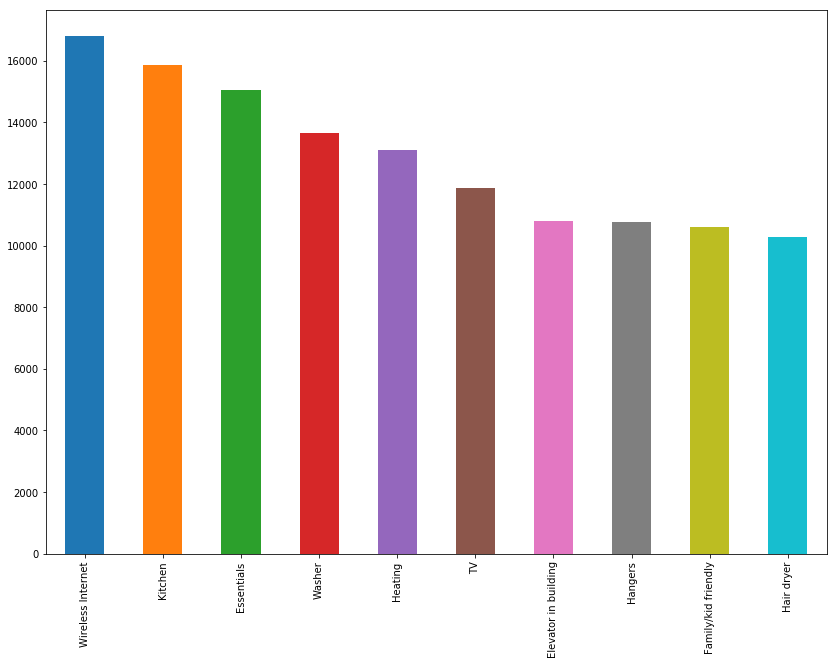

In [166]:
f,ax = plt.subplots(figsize=(14,10))
pd.Series(np.concatenate(listings['amenities'].map(lambda amns:amns.split(',')))).value_counts().head(10).plot(kind='bar')

#### Feature preprocessing

In [53]:
#Feature Columns
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

Find the most common Bathroom & Bedroom combination

In [169]:
listings.loc[(listings['price']<=600) & (listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price']

bathrooms  bedrooms
0.0        1.0           55
           2.0            1
           3.0            1
0.5        0.0            2
           1.0           81
1.0        0.0          466
           1.0         8748
           2.0         2428
           3.0          712
           4.0           70
           5.0            1
           6.0            1
1.5        0.0            7
           1.0          787
           2.0          162
           3.0          144
           4.0           49
           5.0            3
           6.0            1
2.0        0.0            9
           1.0         1233
           2.0          766
           3.0          871
           4.0          330
           5.0           47
           6.0           11
           7.0            1
           8.0            1
2.5        1.0           42
           2.0           19
                       ... 
4.0        1.0           27
           2.0            1
           3.0            5
           4.0           27


In [170]:
listings.loc[(listings['price']<=600) & (listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index()

,bathrooms,bedrooms,price
0,0.0,1.0,55
1,0.0,2.0,1
2,0.0,3.0,1
3,0.5,0.0,2
4,0.5,1.0,81
5,1.0,0.0,466
6,1.0,1.0,8748
7,1.0,2.0,2428
8,1.0,3.0,712
9,1.0,4.0,70


In [171]:
listings.loc[(listings['price']<=600) & (listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index().pivot('bathrooms','bedrooms','price')

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
bathrooms,,,,,,,,,,,
0.0,NaN,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,2.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,466.0,8748.0,2428.0,712.0,70.0,1.0,1.0,NaN,NaN,NaN,NaN
1.5,7.0,787.0,162.0,144.0,49.0,3.0,1.0,NaN,NaN,NaN,NaN
2.0,9.0,1233.0,766.0,871.0,330.0,47.0,11.0,1.0,1.0,NaN,NaN
2.5,NaN,42.0,19.0,35.0,25.0,7.0,6.0,NaN,NaN,NaN,NaN
3.0,1.0,49.0,4.0,68.0,61.0,35.0,15.0,NaN,NaN,NaN,NaN
3.5,NaN,8.0,NaN,4.0,7.0,5.0,2.0,NaN,NaN,NaN,NaN
4.0,NaN,27.0,1.0,5.0,27.0,3.0,6.0,2.0,1.0,2.0,NaN


In [172]:
cur_input = listings.loc[(listings['price']<=600) & (listings['price']>0)].groupby(['bathrooms','bedrooms']).count()['price'].reset_index().pivot('bathrooms','bedrooms','price')

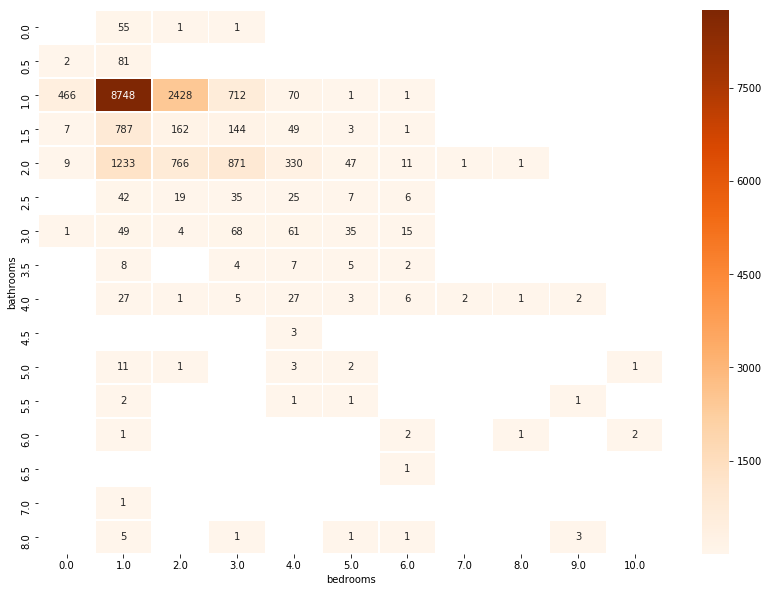

In [178]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(cur_input,cmap='Oranges',annot=True,linewidths=0.5,fmt='.0f')

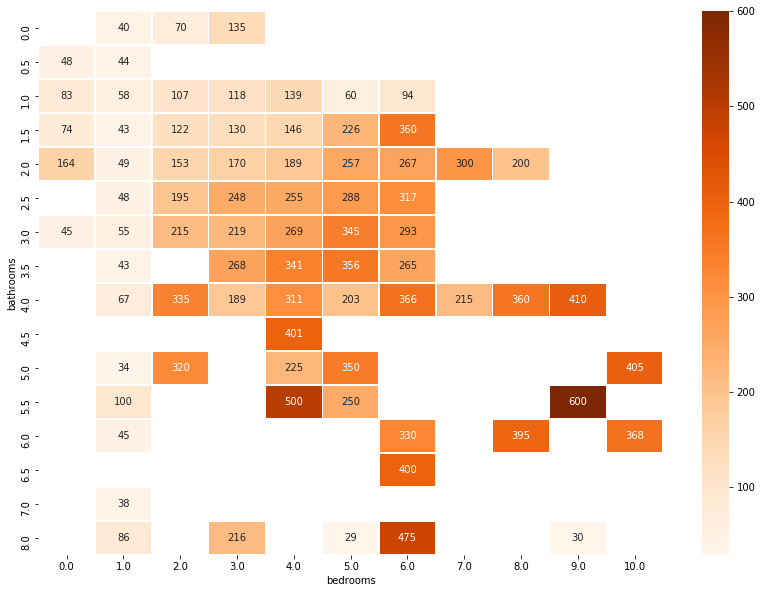

In [179]:
cur_input = listings.loc[(listings['price']<=600) & (listings['price']>0)].groupby(['bathrooms','bedrooms']).mean()['price'].reset_index().pivot('bathrooms','bedrooms','price')
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(cur_input,cmap='Oranges',annot=True,linewidths=0.5,fmt='.0f')

### ML data modeling

In [187]:
listings = pd.read_csv('listings.csv.gz')

e:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [188]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,8207551,https://www.airbnb.com/rooms/8207551,20170407214050,2017-04-08,Room in Sant Antoni huge terrasse,Located between Sant Antoni & Universitat (met...,the apartment is located on the 7th floor and ...,Located between Sant Antoni & Universitat (met...,none,Sant Antoni is a very central neighborhood and...,...,10.0,t,NaN,NaN,f,strict,f,f,2,0.11
1,14958299,https://www.airbnb.com/rooms/14958299,20170407214050,2017-04-08,"Next To Las Ramblas, Unique, Wif1","Brand new apartment, cosy and clean. Only 5 m...","Fun, bohemian. Real Catalan style Well equippe...","Brand new apartment, cosy and clean. Only 5 m...",none,NaN,...,8.0,t,NaN,NaN,t,strict,f,f,1,2.26
2,7766152,https://www.airbnb.com/rooms/7766152,20170407214050,2017-04-08,Sunny whole flat in Raval/Ramblas,"Calm, sunny 43sqm flat. Living room w/balcony ...","Very luminous and calm, in a neighborhood than...","Calm, sunny 43sqm flat. Living room w/balcony ...",none,"Very central, lively, popular hood. Near the s...",...,9.0,t,NaN,NaN,f,strict,f,f,1,0.40
3,9237132,https://www.airbnb.com/rooms/9237132,20170407214050,2017-04-08,Apartment in the heart of Barcelona,The apartment is an ideal place for relax afte...,Both rooms include a comfortable double bed wi...,The apartment is an ideal place for relax afte...,none,NaN,...,9.0,t,NaN,NaN,t,flexible,f,f,1,3.17
4,1406827,https://www.airbnb.com/rooms/1406827,20170407214050,2017-04-08,Centric Bohemian next Ramblas&Macba,Artistic cosy renovated flat 40m2 with balcony...,The apartment is 40m2 and has everything you n...,Artistic cosy renovated flat 40m2 with balcony...,none,Raval is the distric where most of the young a...,...,8.0,t,43212,NaN,t,moderate,f,f,1,5.06


In [189]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

In [190]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [191]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

In [192]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [193]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]

In [194]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

host_is_superhost
host_identity_verified
host_has_profile_pic
host_listings_count
host_total_listings_count
bathrooms
bedrooms
review_scores_rating


In [195]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [196]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

In [197]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

In [198]:
listings_new.head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,security_deposit,cleaning_fee,...,suitable for events,table corner guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,tv,washer,washer / dryer,wheelchair accessible,window guards,wireless internet
0,0.0,1.0,1.0,1,1,0,0,0,0.0,15.0,...,0,0,0,0,1,1,0,0,0,1
1,0.0,0.0,1.0,0,1,1,0,0,0.0,25.0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,1.0,1.0,0,1,0,0,0,300.0,10.0,...,0,0,0,0,0,1,0,0,0,1
3,0.0,0.0,1.0,1,1,1,0,0,100.0,25.0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,1.0,1.0,1,1,1,0,0,100.0,20.0,...,0,0,0,0,0,1,0,0,0,1


#### Random Forest Modeling

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [200]:
y = listings_new['price']
x = listings_new.drop('price',axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [203]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_fit = std.fit(X_train)
X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)

e:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [207]:
rf = RandomForestRegressor(n_estimators=500,n_jobs=-1)
rf.fit(X_train,y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test,y_test_predict)**(1/2)

In [208]:
rmse_rf

49.17860096842832

In [209]:
r2_score(y_test,y_test_predict)

0.5956569010446797

### LightGBM Modeling
- pip install lightgbm

In [211]:
from lightgbm import LGBMRegressor

In [218]:
fit_params ={'early_stopping_rounds':10,
            'eval_metric':'rmse',
            'eval_set':[(X_test,y_test)],
            'eval_names':['valid'],
            'verbose':100}

In [219]:
lgb = LGBMRegressor(max_depth=20,learning_rate =0.01,n_estimators=1000)
lgb.fit(X_train,y_train,**fit_params)

Training until validation scores don't improve for 10 rounds.
[100]	valid's rmse: 56.5932
[200]	valid's rmse: 51.6781
[300]	valid's rmse: 49.8203
[400]	valid's rmse: 48.9246
[500]	valid's rmse: 48.3771
[600]	valid's rmse: 48.0804
[700]	valid's rmse: 47.8965
[800]	valid's rmse: 47.736
[900]	valid's rmse: 47.6294
[1000]	valid's rmse: 47.5355
Did not meet early stopping. Best iteration is:
[1000]	valid's rmse: 47.5355


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.01, max_depth=20, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [220]:
y_pred = lgb.predict(X_test)

In [221]:
r2_score(y_test,y_pred)

0.6222247462743681